In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
import matplotlib.dates as mdates

In [15]:
dataset = pd.read_excel('grocery_price.xlsx', index_col=None)
# transform data to from row to column
dataset = dataset.T
dataset.columns = dataset.iloc[0]
dataset = dataset.drop(dataset.index[0])
# add new column to dataset, average of all column 
dataset['Average'] = round(dataset.mean(axis=1),2)
# remove column 2
dataset = dataset.drop(dataset.columns[0:3], axis=1)


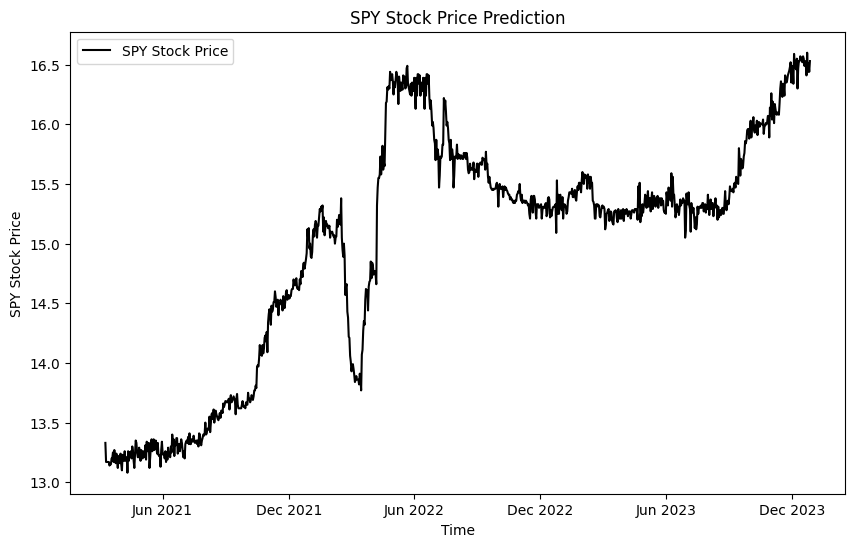

In [16]:
# Prepare dates for the predicted stock prices
date_range = pd.date_range(start='2021-03-10', periods=len(dataset), freq='D')  # 'B' for business day frequency

# Visualizing Results with Month and Year on X-axis
plt.figure(figsize=(10, 6))
plt.plot(date_range, dataset['Average'], color='black', label='SPY Stock Price')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))  # Show tick marks for every 3 months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format x-axis labels as 'Jan 2023', 'Feb 2023', etc.
plt.title('SPY Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('SPY Stock Price')
plt.legend()
plt.show()

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
import matplotlib.dates as mdates
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, GRU, Bidirectional
from keras.optimizers import SGD
from sklearn.metrics import mean_squared_error
from keras.models import load_model

In [18]:


lstm = load_model('LSTM.h5')

# Prepare the dataset for prediction
dataset = pd.read_excel('grocery_price.xlsx', index_col=None)
dataset = dataset.T
dataset.columns = dataset.iloc[0]
dataset = dataset.drop(dataset.index[0])
dataset['Average'] = round(dataset.mean(axis=1),2)
dataset = dataset.drop(dataset.columns[0:3], axis=1)
dataset = dataset.values
dataset

array([[13.33],
       [13.17],
       [13.17],
       ...,
       [16.51],
       [16.44],
       [16.53]])

In [19]:
sc = MinMaxScaler(feature_range=(0,1))
scaled_dataset = sc.fit_transform(dataset)

In [20]:
def create_sequences(data, seq_length=60):
    x=[]
    y=[]
    for i in range(seq_length, len(data)):
        x.append(data[i-seq_length:i,0])
        y.append(data[i,0])
    return np.array(x), np.array(y)


x_test, y_test = create_sequences(scaled_dataset)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [21]:
# Predict the stock price
predicted_stock_price = lstm.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

31/31 [==============================] - 1s 13ms/step


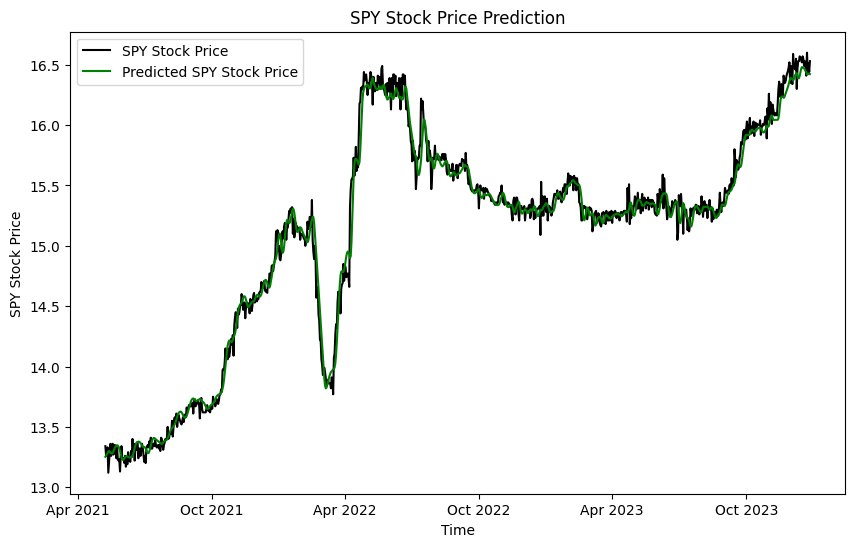

In [22]:
# Visualizing the result
plt.figure(figsize=(10, 6))
plt.plot(date_range[60:], dataset[60:], color='black', label='SPY Stock Price')
plt.plot(date_range[60:], predicted_stock_price, color='green', label='Predicted SPY Stock Price')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.title('SPY Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('SPY Stock Price')
plt.legend()
plt.show()